# Import Libraries 📚

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
warnings.filterwarnings('ignore')

# Dataset Information ℹ️


In [101]:
df = pd.read_csv("Lung Cancer Dataset.csv")
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


# 🔑 Các Đặc Trưng Chính:
Giới tính (GENDER): Giới tính của người tham gia khảo sát (1: Nam, 0: Nữ).

Tuổi (AGE): Tuổi của người tham gia khảo sát.

Hút thuốc (SMOKING): Thói quen hút thuốc (1: Có, 0: Không).

Ngón tay bị đổi màu (FINGER_DISCOLORATION): Biểu hiện ngón tay vàng hoặc đổi màu do hút thuốc nhiều.

Căng thẳng tinh thần (MENTAL_STRESS): Tình trạng bị stress hoặc áp lực tâm lý.

Tiếp xúc với ô nhiễm (EXPOSURE_TO_POLLUTION): Mức độ tiếp xúc với không khí ô nhiễm (1: Có, 0: Không).

Bệnh mãn tính (LONG_TERM_ILLNESS): Có tiền sử mắc bệnh lâu dài (1: Có, 0: Không).

Mức năng lượng (ENERGY_LEVEL): Đánh giá mức năng lượng tổng thể của cơ thể (dưới dạng số thực).

Hệ miễn dịch yếu (IMMUNE_WEAKNESS): Tình trạng miễn dịch yếu (1: Có, 0: Không).

Khó thở (BREATHING_ISSUE): Triệu chứng thở khó, thở ngắn (1: Có, 0: Không).

Sử dụng rượu bia (ALCOHOL_CONSUMPTION): Có uống rượu/bia thường xuyên (1: Có, 0: Không).

Đau họng (THROAT_DISCOMFORT): Có cảm giác đau hoặc khó chịu ở vùng họng (1: Có, 0: Không).

Độ bão hòa oxy (OXYGEN_SATURATION): Nồng độ oxy trong máu (%).

Đau tức ngực (CHEST_TIGHTNESS): Có triệu chứng đau hoặc tức vùng ngực (1: Có, 0: Không).

Tiền sử gia đình (FAMILY_HISTORY): Gia đình có người từng mắc bệnh phổi (1: Có, 0: Không).

Gia đình hút thuốc (SMOKING_FAMILY_HISTORY): Gia đình có người hút thuốc (1: Có, 0: Không).

Suy giảm miễn dịch do stress (STRESS_IMMUNE): Ảnh hưởng tiêu cực của stress đến hệ miễn dịch (1: Có, 0: Không).

# 🎯 Biến Mục Tiêu: Khả năng mắc bệnh phổi (PULMONARY_DISEASE)
YES: Người này có khả năng cao mắc bệnh phổi.

NO: Không có dấu hiệu đáng kể liên quan đến bệnh phổi.

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,5000.0,57.222800,15.799224,30.000000,44.000000,57.000000,71.000000,84.000000
GENDER,5000.0,0.501200,0.500049,0.000000,0.000000,1.000000,1.000000,1.000000
SMOKING,5000.0,0.666400,0.471546,0.000000,0.000000,1.000000,1.000000,1.000000
FINGER_DISCOLORATION,5000.0,0.601200,0.489700,0.000000,0.000000,1.000000,1.000000,1.000000
MENTAL_STRESS,5000.0,0.539800,0.498463,0.000000,0.000000,1.000000,1.000000,1.000000
EXPOSURE_TO_POLLUTION,5000.0,0.516000,0.499794,0.000000,0.000000,1.000000,1.000000,1.000000
LONG_TERM_ILLNESS,5000.0,0.439200,0.496339,0.000000,0.000000,0.000000,1.000000,1.000000
ENERGY_LEVEL,5000.0,55.032043,7.913083,23.258308,49.440685,55.050421,60.323320,83.046971
IMMUNE_WEAKNESS,5000.0,0.394800,0.488857,0.000000,0.000000,0.000000,1.000000,1.000000
BREATHING_ISSUE,5000.0,0.800400,0.399740,0.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [104]:
label_encode = LabelEncoder()
df["PULMONARY_DISEASE"] = label_encode.fit_transform(df["PULMONARY_DISEASE"])

df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


# Exploratoty Data Analysis (EDA) 📊

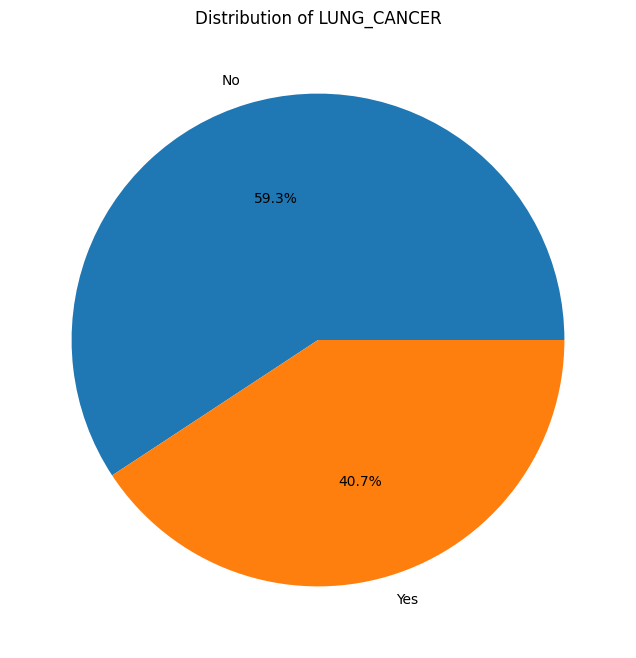

In [105]:
target = df["PULMONARY_DISEASE"].value_counts()
labels = ['No' if i == 0 else 'Yes' for i in target.index]
plt.figure(figsize=(8,8))
plt.pie(target, labels= labels,autopct='%1.1f%%')
plt.title('Distribution of LUNG_CANCER')
plt.show()

<!-- # Training Machine Learning Models 🤖 -->

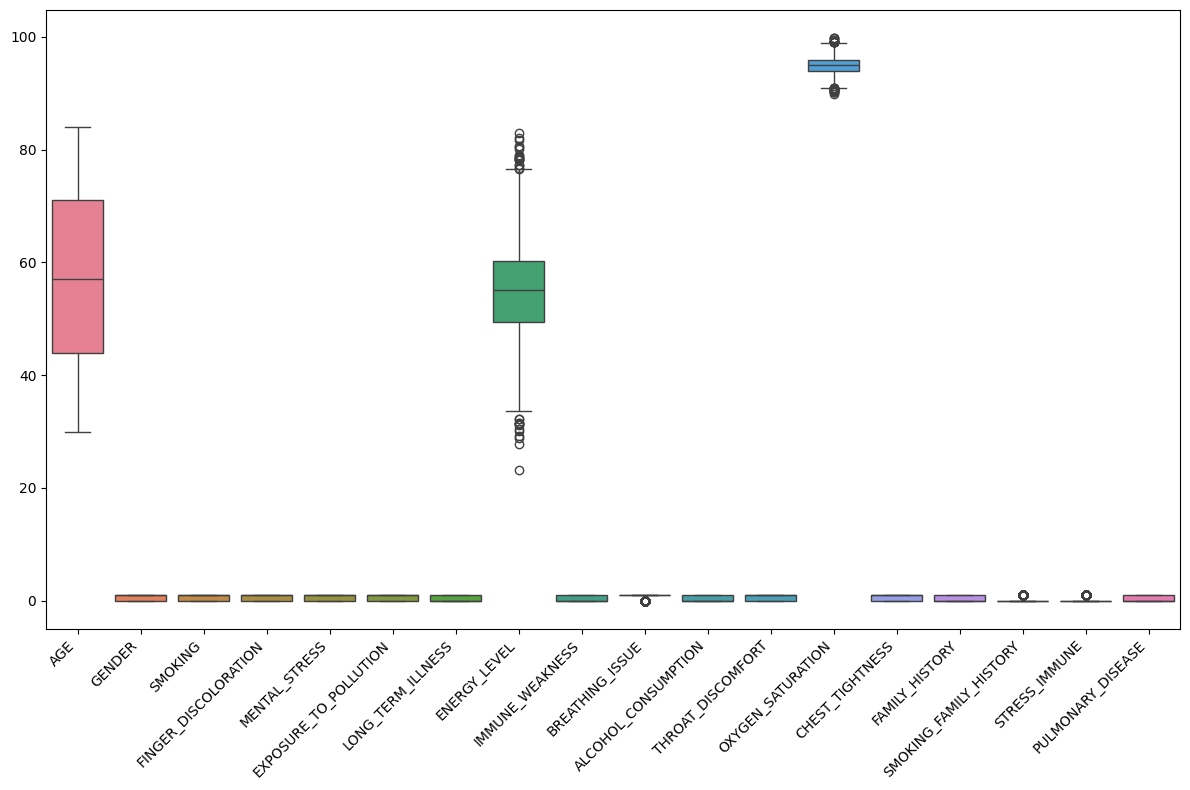

In [106]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

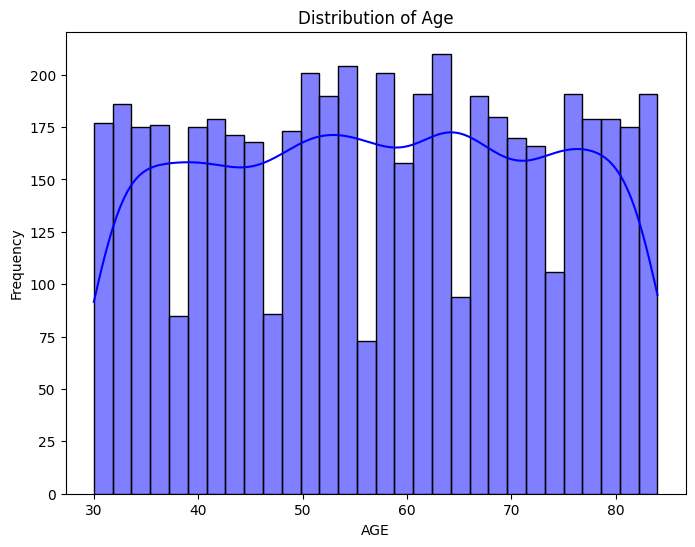

In [107]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.show()

In [108]:
# X = df.drop(columns="Pu")
# y = df['LUNG_CANCER_YES']
# model = RandomForestClassifier(n_estimators=500)
# model.fit(X, y)


# importances = model.feature_importances_
# feature_names = X.columns

# plt.figure(figsize=(14, 10))
# feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
# sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
# plt.title('Feature Importance')
# plt.ylabel('Feature name')
# # plt.xlabel('Importance Score')


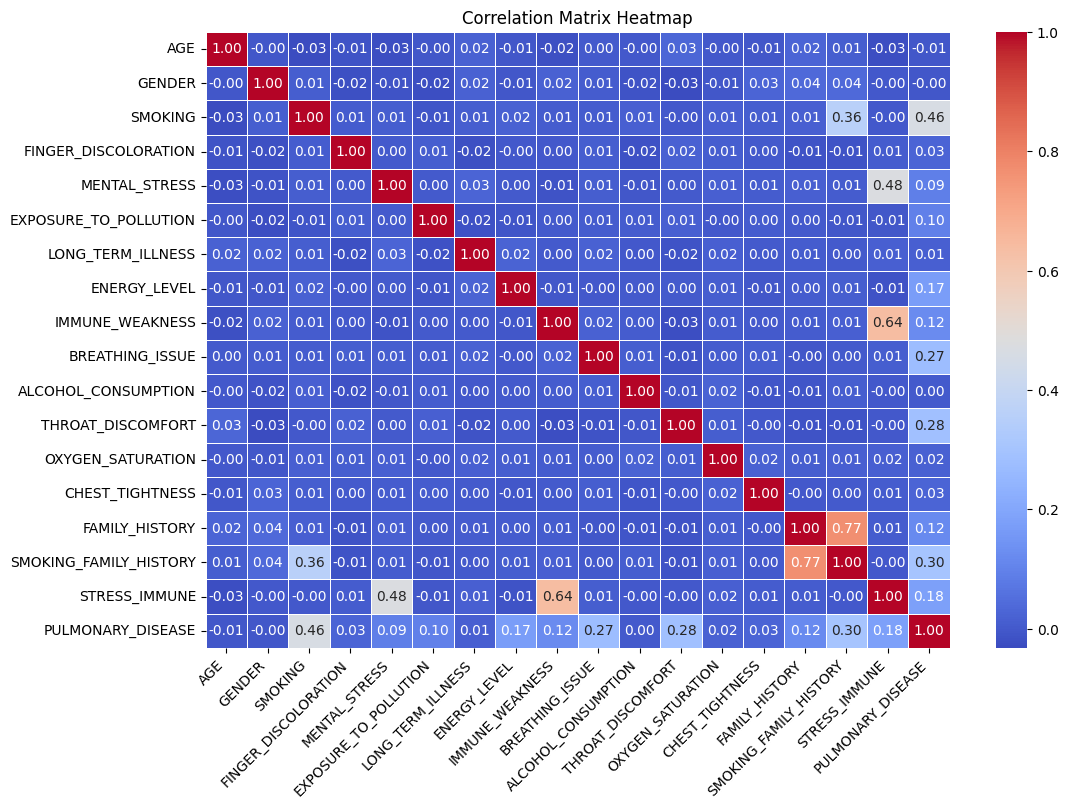

In [109]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title('Correlation Matrix Heatmap')
plt.show()

# BaseLine Models 🤖

In [ ]:
X = df.drop(columns="PULMONARY_DISEASE")
y = df["PULMONARY_DISEASE"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [111]:
models={
    "DecisionTree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Bayes": GaussianNB(),
    "XBboost": XGBClassifier(),
}

In [112]:
for name,model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred) * 100
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"Model: {name} | Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: DecisionTree | Accuracy: 82.60% | Precision: 0.7958 | Recall: 0.7995 | F1-Score: 0.7977
Model: Random Forest | Accuracy: 90.70% | Precision: 0.8981 | Recall: 0.8834 | F1-Score: 0.8907
Model: K-Nearest Neighbor | Accuracy: 62.90% | Precision: 0.5780 | Recall: 0.5012 | F1-Score: 0.5368
Model: Bayes | Accuracy: 87.50% | Precision: 0.8290 | Recall: 0.8928 | F1-Score: 0.8597
Model: XBboost | Accuracy: 90.30% | Precision: 0.8807 | Recall: 0.8951 | F1-Score: 0.8879


In [113]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.913
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       571
           1       0.90      0.89      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

[[530  41]
 [ 46 383]]


# Data Preproccessing 🧹

In [114]:
# Check null data
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [115]:
# Check duplicated data
df.duplicated().sum()

np.int64(0)


Số lượng bản ghi ban đầu: 5000
Số lượng bản ghi sau khi xóa ngoại lai: 4939
Số lượng bản ghi bị xóa: 61

Ngoại lai trong cột AGE:
Số lượng ngoại lai: 0
Giới hạn dưới (lower bound): 3.50
Giới hạn trên (upper bound): 111.50

Ngoại lai trong cột ENERGY_LEVEL:
Số lượng ngoại lai: 31
Giới hạn dưới (lower bound): 33.12
Giới hạn trên (upper bound): 76.65
Các giá trị ngoại lai:
      ENERGY_LEVEL
249      77.325987
441      32.294964
603      83.046971
758      31.117897
1103     78.129695
1177     31.516073
1282     31.378963
1368     82.057943
1439     30.432088
1487     80.735869
1640     30.144592
1698     28.881348
1866     76.727180
1877     29.183424
2046     78.217365
2126     80.120569
2637     78.437421
2753     77.336479
2960     78.951241
3124     31.359792
3125     76.663553
3326     27.764108
3531     78.552928
3661     31.530124
3731     78.693280
3968     81.763798
4119     79.052641
4513     23.258308
4678     32.273260
4755     80.459028
4906     78.402243

Ngoại lai trong c

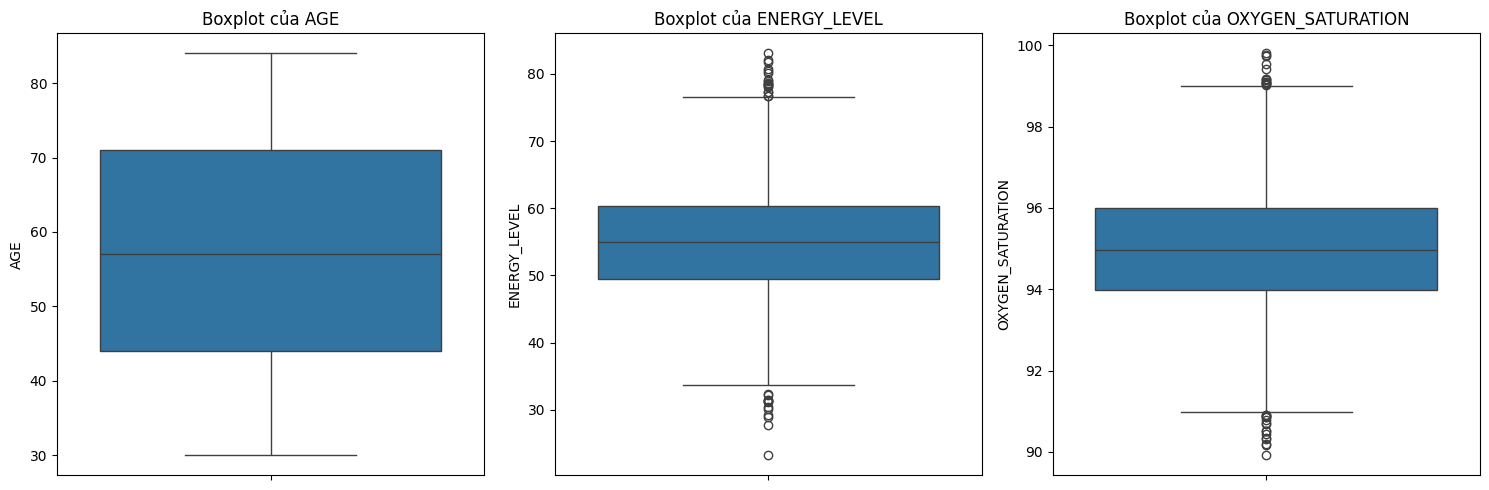

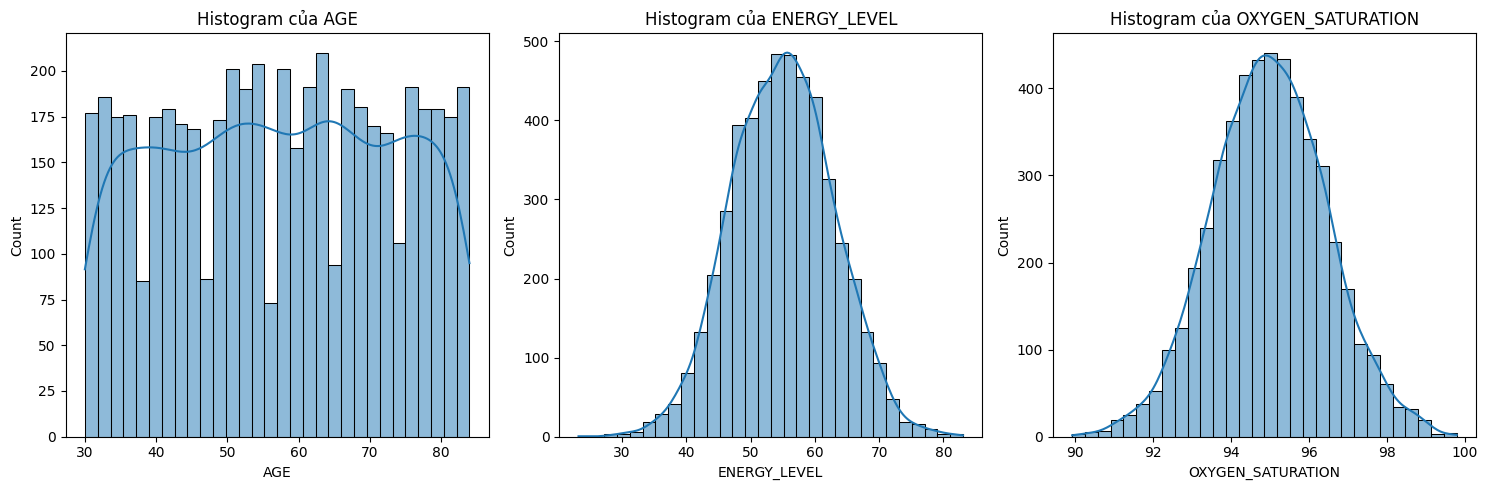

In [116]:
# Xóa các giá trị ngoại lai
# Lưu số lượng bản ghi ban đầu
original_count = len(df)
print(f"\nSố lượng bản ghi ban đầu: {original_count}")

# Tạo mask để giữ các hàng không chứa ngoại lai
mask = pd.Series(True, index=df.index)
for column in numeric_columns:
    _, lower_bound, upper_bound, non_outlier_mask = detect_outliers_iqr(df, column)
    mask = mask & non_outlier_mask

# Lọc dữ liệu để giữ các hàng không chứa ngoại lai
df_cleaned = df[mask].copy()

# In số lượng bản ghi sau khi xóa ngoại lai
cleaned_count = len(df_cleaned)
print(f"Số lượng bản ghi sau khi xóa ngoại lai: {cleaned_count}")
print(f"Số lượng bản ghi bị xóa: {original_count - cleaned_count}")

plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    # Phát hiện ngoại lai
    outliers, lower_bound, upper_bound, _ = detect_outliers_iqr(df, column)
    
    # In số lượng ngoại lai và thông tin
    print(f"\nNgoại lai trong cột {column}:")
    print(f"Số lượng ngoại lai: {len(outliers)}")
    print(f"Giới hạn dưới (lower bound): {lower_bound:.2f}")
    print(f"Giới hạn trên (upper bound): {upper_bound:.2f}")
    if not outliers.empty:
        print("Các giá trị ngoại lai:")
        print(outliers)
    
    # Vẽ boxplot
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot của {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Vẽ histogram để xem phân phối
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Histogram của {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [117]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [118]:
def imbalance_data(X,y):
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X,y)
    return X_resampled, y_resampled

In [119]:
X_train, X_test = scale_data(X_train, X_test)

In [120]:
X_train_smote, y_train_smote = imbalance_data(X_train,y_train)

In [121]:
for name,model in models.items():
  model.fit(X_train_smote, y_train_smote)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred) * 100
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"Model: {name} | Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: DecisionTree | Accuracy: 82.90% | Precision: 0.7892 | Recall: 0.8205 | F1-Score: 0.8046
Model: Random Forest | Accuracy: 91.80% | Precision: 0.9026 | Recall: 0.9068 | F1-Score: 0.9047
Model: K-Nearest Neighbor | Accuracy: 85.30% | Precision: 0.7854 | Recall: 0.9044 | F1-Score: 0.8407
Model: Bayes | Accuracy: 86.40% | Precision: 0.8084 | Recall: 0.8951 | F1-Score: 0.8496
Model: XBboost | Accuracy: 90.80% | Precision: 0.8891 | Recall: 0.8974 | F1-Score: 0.8933


In [122]:
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    
    # Đánh giá trên tập huấn luyện
    y_train_pred = model.predict(X_train_smote)
    train_accuracy = accuracy_score(y_train_smote, y_train_pred) * 100
    print(f"Model: {name} | Train Accuracy: {train_accuracy:.2f}%")
    
    # Đánh giá trên tập kiểm tra
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {name} | Test Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: DecisionTree | Train Accuracy: 100.00%
Model: DecisionTree | Test Accuracy: 82.60% | Precision: 0.7878 | Recall: 0.8135 | F1-Score: 0.8005
Model: Random Forest | Train Accuracy: 100.00%
Model: Random Forest | Test Accuracy: 91.10% | Precision: 0.8991 | Recall: 0.8928 | F1-Score: 0.8959
Model: K-Nearest Neighbor | Train Accuracy: 90.51%
Model: K-Nearest Neighbor | Test Accuracy: 85.30% | Precision: 0.7854 | Recall: 0.9044 | F1-Score: 0.8407
Model: Bayes | Train Accuracy: 85.99%
Model: Bayes | Test Accuracy: 86.40% | Precision: 0.8084 | Recall: 0.8951 | F1-Score: 0.8496
Model: XBboost | Train Accuracy: 98.98%
Model: XBboost | Test Accuracy: 90.80% | Precision: 0.8891 | Recall: 0.8974 | F1-Score: 0.8933


In [123]:
model = RandomForestClassifier(n_estimators=1000,max_depth=30,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.918
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       571
           1       0.91      0.90      0.90       429

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

[[531  40]
 [ 42 387]]


In [124]:
random_forest = RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_split=2,min_samples_leaf=1)

# RandomOversampler
forest_rov = random_forest.fit(X_train_smote,y_train_smote)